## Task 1

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [28]:
df.shape

(1025, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.target.value_counts()
#almost balanced

target
1    526
0    499
Name: count, dtype: int64

In [34]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.duplicated().sum()

723

In [30]:
df = df.drop_duplicates(keep='last')

In [32]:
df.duplicated().sum()

0

feature scaling is not needed for random forest, xgboost, and adaboost

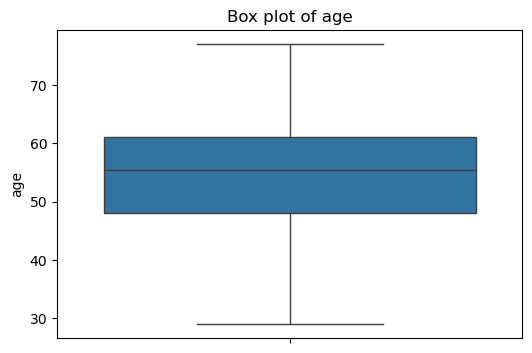

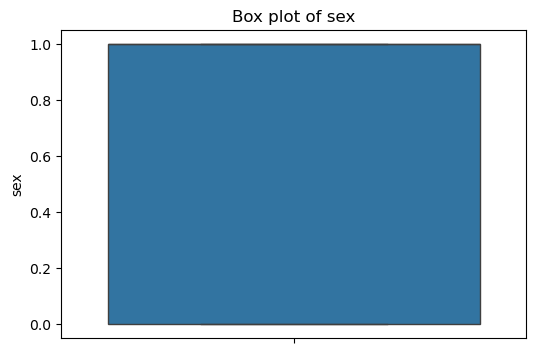

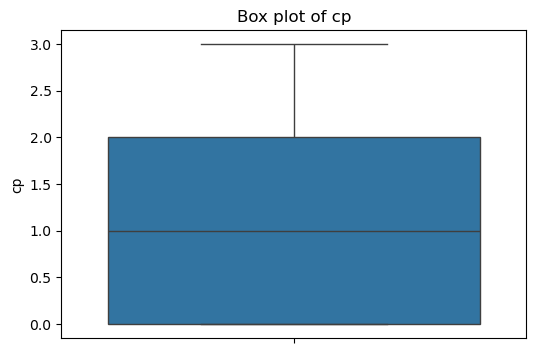

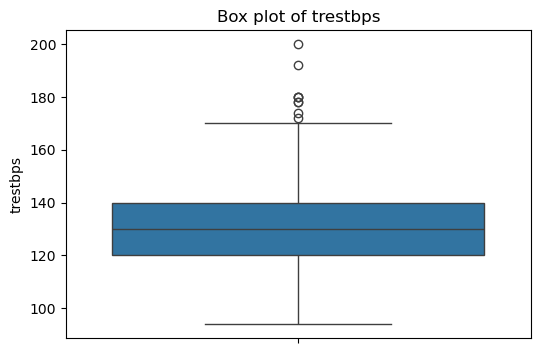

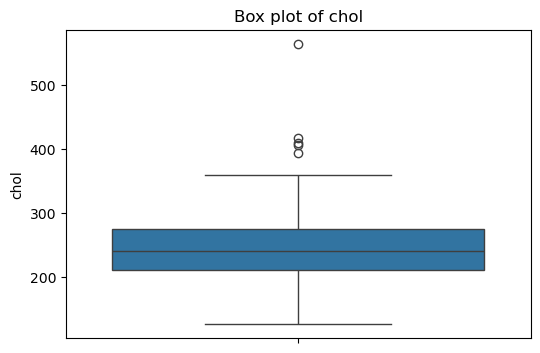

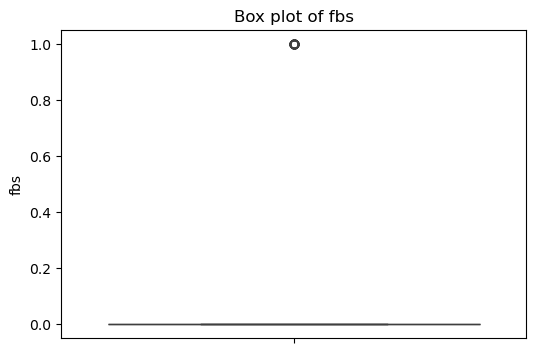

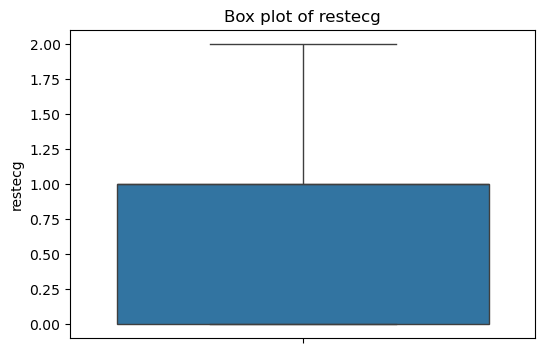

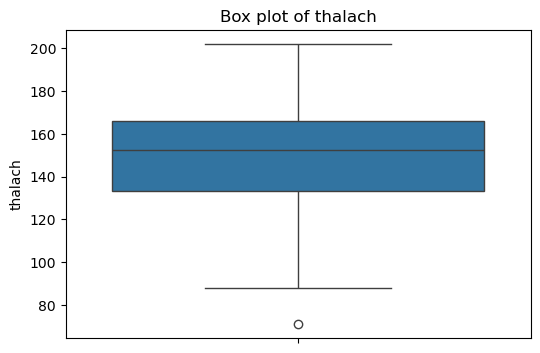

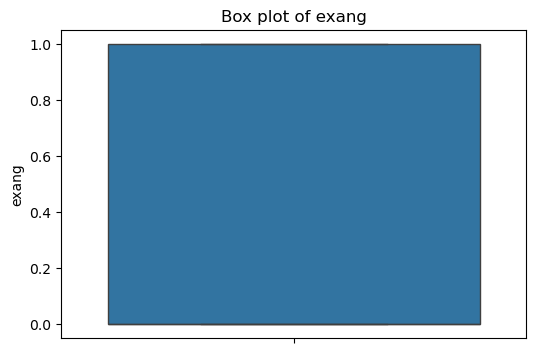

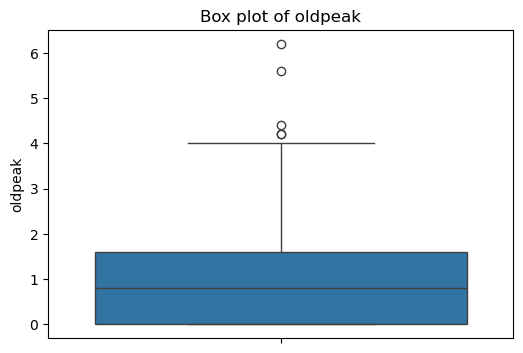

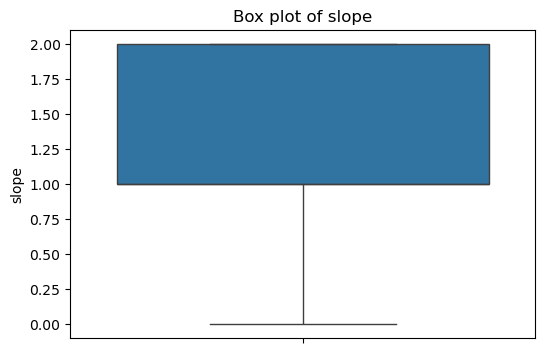

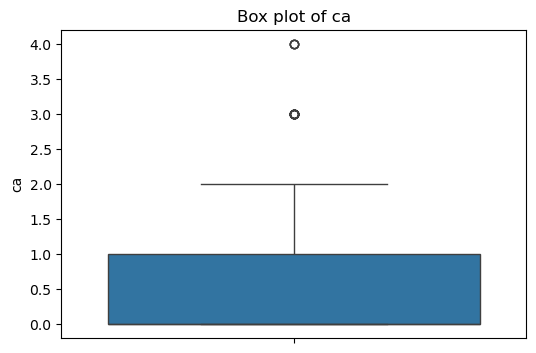

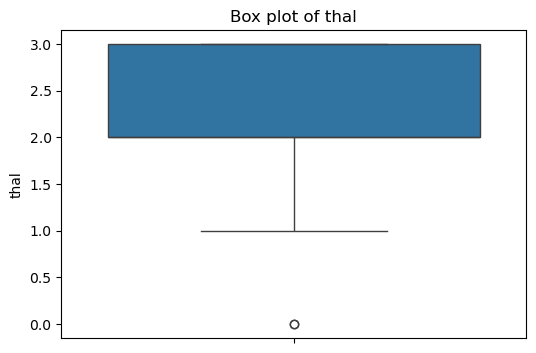

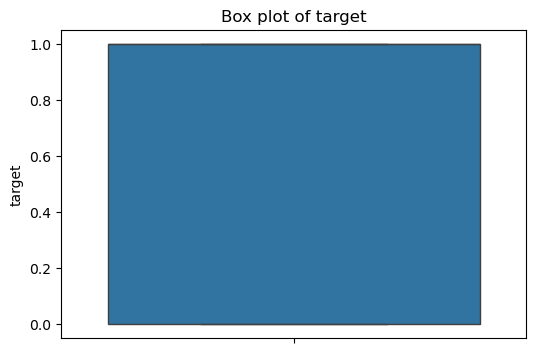

In [43]:
#checking outliers
for column in df.select_dtypes(include='number'):
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f"Box plot of {column}")
    plt.show()

In [45]:
for column in df.select_dtypes(include='number'):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr 
    upper = q3 + 1.5 * iqr
    outliers_count = ((df[column] < lower) | (df[column] > upper)).sum()
    print(f"{column}: {outliers_count} outliers, {(outliers_count/len(df.select_dtypes(include='number')) * 100 ):.2f}%")

age: 0 outliers, 0.00%
sex: 0 outliers, 0.00%
cp: 0 outliers, 0.00%
trestbps: 9 outliers, 2.98%
chol: 5 outliers, 1.66%
fbs: 45 outliers, 14.90%
restecg: 0 outliers, 0.00%
thalach: 1 outliers, 0.33%
exang: 0 outliers, 0.00%
oldpeak: 5 outliers, 1.66%
slope: 0 outliers, 0.00%
ca: 24 outliers, 7.95%
thal: 2 outliers, 0.66%
target: 0 outliers, 0.00%


outliers are not much present, but the one present represents the data. Furthermore, random forest, agboost and adaboost are robust to outliers

In [66]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=0)

#random forest, xgboost, adaboost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
y_pred = rf.predict(X_test)

print("Random Forest\nTesting Accuracy:", accuracy_score(y_test, y_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

adb = AdaBoostClassifier(n_estimators=100, random_state=1)
adb.fit(X_train, y_train)
y_val_pred = adb.predict(X_val)
y_pred = adb.predict(X_test)

print("\nAda Boost\nTesting Accuracy:", accuracy_score(y_test, y_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(adb.score(X_test, y_test))

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=1)
xgb.fit(X_train, y_train)
y_val_pred = xgb.predict(X_val)
y_pred = xgb.predict(X_test)

print("\nXG Boost\nTesting Accuracy:", accuracy_score(y_test, y_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


Random Forest
Testing Accuracy: 0.7868852459016393
Validation Accuracy: 0.7808219178082192

Ada Boost
Testing Accuracy: 0.8524590163934426
Validation Accuracy: 0.863013698630137
0.8524590163934426


C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



XG Boost
Testing Accuracy: 0.7868852459016393
Validation Accuracy: 0.7671232876712328


## Task 2:

In [68]:
df2 = df[['restecg', 'oldpeak']]

In [110]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier()
model4 = XGBClassifier()

x = df2.iloc[:, :]
y =  df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

estimators_ = [('rf', model1), ('dt', model2), ('knn', model3), ('xg', model4)]

model = VotingClassifier(estimators_, voting='hard')
model.fit(X_train, y_train)
print(f"Hard Voting Accuracy: {model.score(X_test, y_test)}")

modell = VotingClassifier(estimators_, voting='soft')
modell.fit(X_train, y_train)
print(f"Soft Voting Accuracy: {modell.score(X_test, y_test)}")

Hard Voting Accuracy: 0.6721311475409836
Soft Voting Accuracy: 0.6557377049180327


In [112]:
voting_weighted = VotingClassifier(
    estimators_,
    voting='soft',
    weights=[1,1,2,3]   # More weight to RandomForest & XGB
)
voting_weighted.fit(X_train, y_train)
weighted_acc = accuracy_score(y_test, voting_weighted.predict(X_test))

print("Weighted Soft Voting Accuracy:", weighted_acc)


Weighted Soft Voting Accuracy: 0.6721311475409836


C:\Users\Amna\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Amna\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Amna\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Amna\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

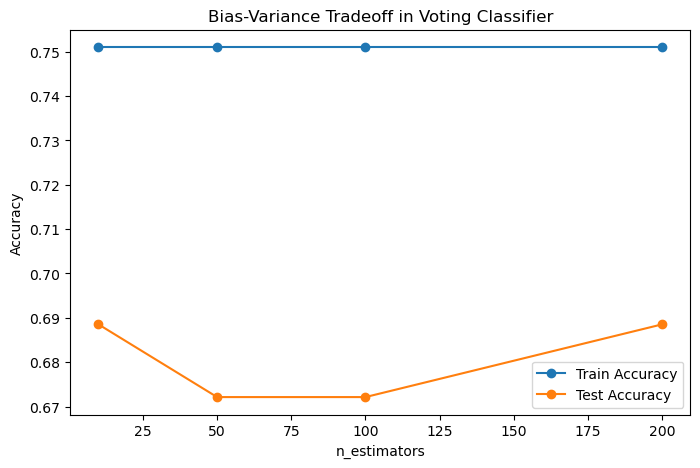

In [118]:
import matplotlib.pyplot as plt

train_scores, test_scores = [], []
estimators_range = [10, 50, 100, 200]

for n in estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    xgb = XGBClassifier(n_estimators=n, use_label_encoder=False, eval_metric='logloss')
    
    voting = VotingClassifier(
        estimators=[('dt', model2), ('knn', model3), ('rf', rf), ('xgb', xgb)], 
        voting='soft', weights=[1,1,2,3]
    )
    voting.fit(X_train, y_train)
    
    train_scores.append(accuracy_score(y_train, voting.predict(X_train)))
    test_scores.append(accuracy_score(y_test, voting.predict(X_test)))

plt.figure(figsize=(8,5))
plt.plot(estimators_range, train_scores, label="Train Accuracy", marker='o')
plt.plot(estimators_range, test_scores, label="Test Accuracy", marker='o')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff in Voting Classifier")
plt.legend()
plt.show()


## Task 3

In [84]:
df3 = df[['restecg', 'chol']]

In [90]:
x = df3.iloc[:, :]
y =  df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

model5 = AdaBoostClassifier()
estimators_ = [('rf', model1), ('adb', model5)]

model = VotingClassifier(estimators_, voting='hard')
model.fit(X_train, y_train)
print(f"Hard Voting Accuracy: {model.score(X_test, y_test)}")
hard_voting_train_acc = accuracy_score(y_train, model.predict(X_train))
hard_voting_test_acc = accuracy_score(y_test, model.predict(X_test))

modell = VotingClassifier(estimators_, voting='soft')
modell.fit(X_train, y_train)
print(f"Soft Voting Accuracy: {modell.score(X_test, y_test)}")
soft_voting_train_acc = accuracy_score(y_train, modell.predict(X_train))
soft_voting_test_acc = accuracy_score(y_test, modell.predict(X_test))

C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Hard Voting Accuracy: 0.45901639344262296
Soft Voting Accuracy: 0.5081967213114754


C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [92]:
model1.fit(X_train, y_train)
model1_train_acc = accuracy_score(y_train, model1.predict(X_train))
model1_test_acc = accuracy_score(y_test, model1.predict(X_test))

# AdaBoost
model5.fit(X_train, y_train)
model5_train_acc = accuracy_score(y_train, model5.predict(X_train))
model5_test_acc = accuracy_score(y_test, model5.predict(X_test))

print("Random Forest -> Train:", model1_train_acc, " Test:", model1_test_acc)
print("AdaBoost      -> Train:", model5_train_acc, " Test:", model5_test_acc)


Random Forest -> Train: 0.9004149377593361  Test: 0.5245901639344263
AdaBoost      -> Train: 0.6721991701244814  Test: 0.45901639344262296


C:\Users\Amna\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


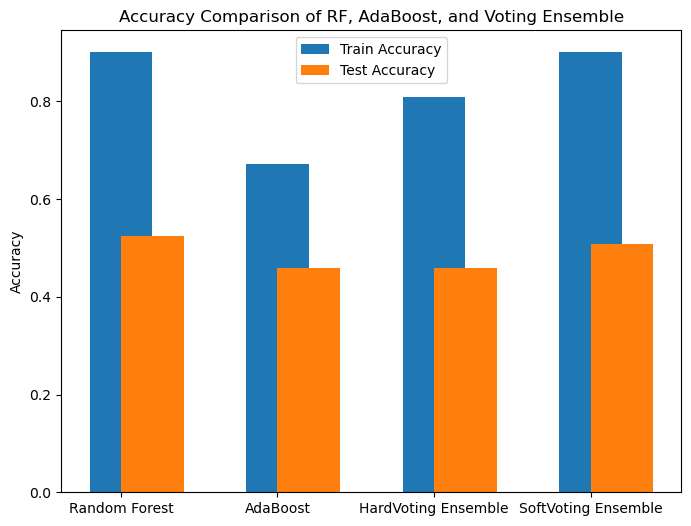

In [106]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'AdaBoost', 'HardVoting Ensemble', 'SoftVoting Ensemble']
train_acc = [model1_train_acc, model5_train_acc, hard_voting_train_acc, soft_voting_train_acc]
test_acc = [model1_test_acc, model5_test_acc, hard_voting_test_acc, soft_voting_test_acc]

x = range(len(models))
plt.figure(figsize=(8,6))

plt.bar(x, train_acc, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_acc, width=0.4, label='Test Accuracy', align='edge')

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of RF, AdaBoost, and Voting Ensemble")
plt.legend()
plt.show()
